In [1]:
# MNİST import etme
from keras.datasets import mnist

# Train ve test verilerini yükleme
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
# 28x28 piksel görüntüleri vektöre dönüştürme
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [3]:
from sklearn.model_selection import train_test_split

X_validation_train, X_validation_test, y_validation_train, y_validation_test = train_test_split(x_train, y_train, test_size=0.2, shuffle=True)

In [4]:
# Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)
tree_preds = tree_clf.predict(x_test)
tree_accuracy = accuracy_score(y_test, tree_preds)

In [5]:
# SVM
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(x_train, y_train)
svm_preds = svm_clf.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_preds)

In [6]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
knn_preds = knn_clf.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_preds)

In [7]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)
rf_preds = rf_clf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_preds)

In [8]:
# Sonuçlar
print("Decision Tree Accuracy:", tree_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)

Decision Tree Accuracy: 0.8755
Random Forest Accuracy: 0.9705
SVM Accuracy: 0.9792
KNN Accuracy: 0.9688


In [9]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
# pikselleri 0 ile 1 arasında ölçeklendirme
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# Neural Network oluşturma
from keras.models import Sequential

model = Sequential()

In [12]:
# Katman oluşturma
from keras.layers import Dense, Flatten

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(120,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [13]:
# Modeli compile etme
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Sinir ağını eğitme

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2630 - accuracy: 0.9255 - val_loss: 0.1327 - val_accuracy: 0.9605
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1162 - accuracy: 0.9658 - val_loss: 0.1056 - val_accuracy: 0.9679
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0796 - accuracy: 0.9755 - val_loss: 0.0934 - val_accuracy: 0.9719
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0603 - accuracy: 0.9813 - val_loss: 0.0819 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0471 - accuracy: 0.9853 - val_loss: 0.0797 - val_accuracy: 0.9755
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0377 - accuracy: 0.9878 - val_loss: 0.0715 - val_accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0306 - accuracy: 0.9898 - val_loss: 0.0783 - val_accuracy:

In [15]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

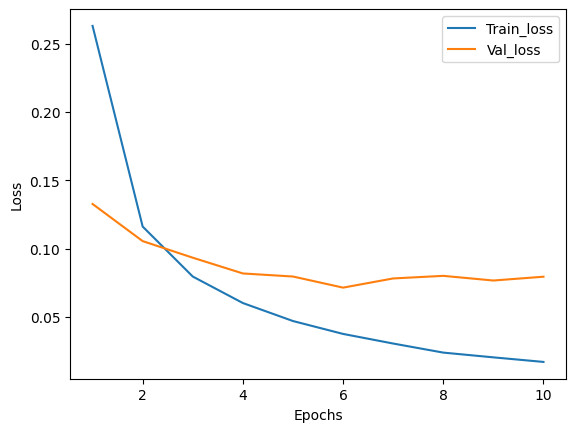

In [16]:
# loss eğrisi 
from matplotlib import pyplot as plt

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train_loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
# Modelin özeti
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 120)               94200     
                                                                 
 dense_1 (Dense)             (None, 10)                1210      
                                                                 
Total params: 95410 (372.70 KB)
Trainable params: 95410 (372.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Test verileriyle tahmin olasılıkları hesaplama
test_prob = model.predict(X_test)
test_prob

313/313 [==============================] - 0s 663us/step


array([[8.3527700e-09, 8.1759272e-10, 3.1957757e-08, ..., 9.9940801e-01,
        1.8938461e-08, 9.6145936e-07],
       [4.8687937e-10, 1.7310052e-07, 9.9999976e-01, ..., 7.9444586e-16,
        9.6064290e-10, 3.8410495e-21],
       [1.7987530e-09, 9.9995720e-01, 6.4539890e-06, ..., 1.9895711e-05,
        8.2805755e-06, 3.4928813e-09],
       ...,
       [1.0437410e-17, 2.8741912e-14, 1.4519454e-14, ..., 2.3950252e-08,
        6.5953232e-10, 4.8523251e-08],
       [6.6492818e-14, 2.6685733e-16, 1.4484968e-13, ..., 7.9765585e-16,
        1.2392961e-09, 2.2471371e-17],
       [2.7569760e-13, 4.9177732e-18, 6.5122988e-13, ..., 1.4207337e-15,
        2.6869091e-12, 5.9682180e-17]], dtype=float32)

In [19]:
# En yüksek olasılık sahip sınıfı seçme
pred = test_prob.argmax(axis = 1)

In [20]:
# Doğruluk
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.9793


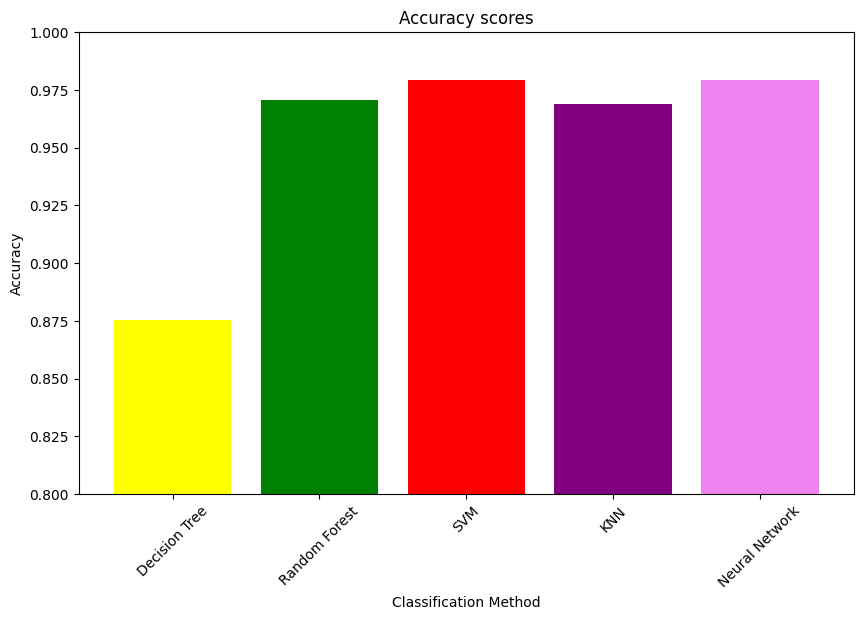

In [21]:
# Accuracy score karşılaştırması
accuracy_scores = [tree_accuracy, rf_accuracy, svm_accuracy, knn_accuracy, accuracy]
classifiers = ["Decision Tree", "Random Forest", "SVM", "KNN", "Neural Network"]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracy_scores, color=['yellow', 'green', 'red', 'purple', 'violet'])
plt.xlabel('Classification Method')
plt.ylabel('Accuracy')
plt.title('Accuracy scores')
plt.ylim(0.8, 1.0) 
plt.xticks(rotation=45)
plt.show()